# Project Business Statistics: E-news Express<a href="#Project-Business-Statistics:-E-news-Express"
class="anchor-link">¶</a>

**Marks: 60**

## Business Context<a href="#Business-Context" class="anchor-link">¶</a>

The advent of e-news, or electronic news, portals has offered us a great
opportunity to quickly get updates on the day-to-day events occurring
globally. The information on these portals is retrieved electronically
from online databases, processed using a variety of software, and then
transmitted to the users. There are multiple advantages of transmitting
new electronically, like faster access to the content and the ability to
utilize different technologies such as audio, graphics, video, and other
interactive elements that are either not being used or aren’t common yet
in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by
acquiring new subscribers. With every visitor to the website taking
certain actions based on their interest, the company plans to analyze
these actions to understand user interests and determine how to drive
better engagement. The executives at E-news Express are of the opinion
that there has been a decline in new monthly subscribers compared to the
past year because the current webpage is not designed well enough in
terms of the outline & recommended content to keep customers engaged
long enough to make a decision to subscribe.

\[Companies often analyze user responses to two variants of a product to
decide which of the two variants is more effective. This experimental
technique, known as A/B testing, is used to determine whether a new
feature attracts users based on a chosen metric.\]

## Objective<a href="#Objective" class="anchor-link">¶</a>

The design team of the company has researched and created a new landing
page that has a new outline & more relevant content shown compared to
the old page. In order to test the effectiveness of the new landing page
in gathering new subscribers, the Data Science team conducted an
experiment by randomly selecting 100 users and dividing them equally
into two groups. The existing landing page was served to the first group
(control group) and the new landing page to the second group (treatment
group). Data regarding the interaction of users in both groups with the
two versions of the landing page was collected. Being a data scientist
in E-news Express, you have been asked to explore the data and perform a
statistical analysis (at a significance level of 5%) to determine the
effectiveness of the new landing page in gathering new subscribers for
the news portal by answering the following questions:

1.  Do the users spend more time on the new landing page than on the
    existing landing page?

2.  Is the conversion rate (the proportion of users who visit the
    landing page and get converted) for the new page greater than the
    conversion rate for the old page?

3.  Does the converted status depend on the preferred language? \[Hint:
    Create a contingency table using the pandas.crosstab() function\]

4.  Is the time spent on the new page the same for the different
    language users?

## Data Dictionary<a href="#Data-Dictionary" class="anchor-link">¶</a>

The data contains information regarding the interaction of users in both
groups with the two versions of the landing page.

1.  user_id - Unique user ID of the person visiting the website

2.  group - Whether the user belongs to the first group (control) or the
    second group (treatment)

3.  landing_page - Whether the landing page is new or old

4.  time_spent_on_the_page - Time (in minutes) spent by the user on the
    landing page

5.  converted - Whether the user gets converted to a subscriber of the
    news portal or not

6.  language_preferred - Language chosen by the user to view the landing
    page

## Import all the necessary libraries<a href="#Import-all-the-necessary-libraries" class="anchor-link">¶</a>

In \[2\]:

    #import the required functions
    import numpy as np
    import pandas as pd
    from matplotlib import pyplot as plt
    import seaborn as sns
    %matplotlib inline
    import scipy.stats as stats

## Reading the Data into a DataFrame<a href="#Reading-the-Data-into-a-DataFrame" class="anchor-link">¶</a>

In \[3\]:

    from google.colab import drive
    drive.mount('/content/drive/')

    Mounted at /content/drive/

In \[4\]:

    df = pd.read_csv('/content/drive/My Drive/abtest/abtest.csv')
    df

Out\[4\]:

|     | user_id | group     | landing_page | time_spent_on_the_page | converted | language_preferred |
|-----|---------|-----------|--------------|------------------------|-----------|--------------------|
| 0   | 546592  | control   | old          | 3.48                   | no        | Spanish            |
| 1   | 546468  | treatment | new          | 7.13                   | yes       | English            |
| 2   | 546462  | treatment | new          | 4.40                   | no        | Spanish            |
| 3   | 546567  | control   | old          | 3.02                   | no        | French             |
| 4   | 546459  | treatment | new          | 4.75                   | yes       | Spanish            |
| ... | ...     | ...       | ...          | ...                    | ...       | ...                |
| 95  | 546446  | treatment | new          | 5.15                   | no        | Spanish            |
| 96  | 546544  | control   | old          | 6.52                   | yes       | English            |
| 97  | 546472  | treatment | new          | 7.07                   | yes       | Spanish            |
| 98  | 546481  | treatment | new          | 6.20                   | yes       | Spanish            |
| 99  | 546483  | treatment | new          | 5.86                   | yes       | English            |

100 rows × 6 columns



Observations: The dataframe contains 6 columns as mentioned in the data
dictionary and each row corresponds to each user_id.

## Explore the dataset and extract insights using Exploratory Data Analysis<a
href="#Explore-the-dataset-and-extract-insights-using-Exploratory-Data-Analysis"
class="anchor-link">¶</a>

-   Data Overview
    -   Viewing the first and last few rows of the dataset
    -   Checking the shape of the dataset
    -   Getting the statistical summary for the variables
-   Check for missing values
-   Check for duplicates

In \[ \]:

    # view the first 5 rows of the dataset
    df.head()

Out\[ \]:

|     | user_id | group     | landing_page | time_spent_on_the_page | converted | language_preferred |
|-----|---------|-----------|--------------|------------------------|-----------|--------------------|
| 0   | 546592  | control   | old          | 3.48                   | no        | Spanish            |
| 1   | 546468  | treatment | new          | 7.13                   | yes       | English            |
| 2   | 546462  | treatment | new          | 4.40                   | no        | Spanish            |
| 3   | 546567  | control   | old          | 3.02                   | no        | French             |
| 4   | 546459  | treatment | new          | 4.75                   | yes       | Spanish            |

In \[ \]:

    # view the last 5 rows of the dataset
    df.tail()

Out\[ \]:

|     | user_id | group     | landing_page | time_spent_on_the_page | converted | language_preferred |
|-----|---------|-----------|--------------|------------------------|-----------|--------------------|
| 95  | 546446  | treatment | new          | 5.15                   | no        | Spanish            |
| 96  | 546544  | control   | old          | 6.52                   | yes       | English            |
| 97  | 546472  | treatment | new          | 7.07                   | yes       | Spanish            |
| 98  | 546481  | treatment | new          | 6.20                   | yes       | Spanish            |
| 99  | 546483  | treatment | new          | 5.86                   | yes       | English            |

Observations: There are five rows containing complete data. Language
preferred are two spanish and two english.

In \[ \]:

    # view the shape of the dataset
    df.shape

Out\[ \]:

    (100, 6)

Observations: There are 6 columns and 100 rows in this dataset.

In \[ \]:

    # check the info()
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 100 entries, 0 to 99
    Data columns (total 6 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   user_id                 100 non-null    int64  
     1   group                   100 non-null    object 
     2   landing_page            100 non-null    object 
     3   time_spent_on_the_page  100 non-null    float64
     4   converted               100 non-null    object 
     5   language_preferred      100 non-null    object 
    dtypes: float64(1), int64(1), object(4)
    memory usage: 4.8+ KB

Observations : My preview of this data states that the data is complete
and there are 4 columns are of object type, one column is of int64 and
another column is float64

In \[ \]:

    # check for duplicates
    df.duplicated().head(100)

Out\[ \]:

    0     False
    1     False
    2     False
    3     False
    4     False
          ...  
    95    False
    96    False
    97    False
    98    False
    99    False
    Length: 100, dtype: bool

Observations: There are no duplicated data

In \[ \]:

    #finding out missing values
    df.isnull().sum()

Out\[ \]:

    user_id                   0
    group                     0
    landing_page              0
    time_spent_on_the_page    0
    converted                 0
    language_preferred        0
    dtype: int64

Observations: There are no null values in the data.

In \[ \]:

    #finding out the statistical summary
    df.describe(include = 'all').T

Out\[ \]:

|                        | count | unique | top     | freq | mean     | std       | min      | 25%       | 50%      | 75%       | max      |
|------------------------|-------|--------|---------|------|----------|-----------|----------|-----------|----------|-----------|----------|
| user_id                | 100.0 | NaN    | NaN     | NaN  | 546517.0 | 52.295779 | 546443.0 | 546467.75 | 546492.5 | 546567.25 | 546592.0 |
| group                  | 100   | 2      | control | 50   | NaN      | NaN       | NaN      | NaN       | NaN      | NaN       | NaN      |
| landing_page           | 100   | 2      | old     | 50   | NaN      | NaN       | NaN      | NaN       | NaN      | NaN       | NaN      |
| time_spent_on_the_page | 100.0 | NaN    | NaN     | NaN  | 5.3778   | 2.378166  | 0.19     | 3.88      | 5.415    | 7.0225    | 10.71    |
| converted              | 100   | 2      | yes     | 54   | NaN      | NaN       | NaN      | NaN       | NaN      | NaN       | NaN      |
| language_preferred     | 100   | 3      | Spanish | 34   | NaN      | NaN       | NaN      | NaN       | NaN      | NaN       | NaN      |

Observations: -There are 100 users that access the Enews site. -The
average time spent on the page is 5.3778, 75% of the users spent 7
minutes.

### Univariate Analysis<a href="#Univariate-Analysis" class="anchor-link">¶</a>

#### User_id<a href="#User_id" class="anchor-link">¶</a>

In \[ \]:

    #checking for unique users
    df['user_id'].nunique()

Out\[ \]:

    100

Observations: There are 100 unique users

#### Language_preferred<a href="#Language_preferred" class="anchor-link">¶</a>

In \[ \]:

    #checking for unique users
    df['language_preferred'].nunique()

Out\[ \]:

    3

Observations: There are 3 unique language preferred.

In \[ \]:

    #checking for unique users
    df['language_preferred'].value_counts()

Out\[ \]:

    Spanish    34
    French     34
    English    32
    Name: language_preferred, dtype: int64

In \[ \]:

    sns.countplot(data=df,x='language_preferred')
    plt.show()

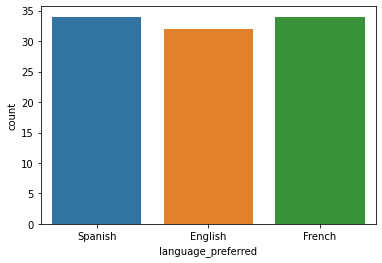

Observations: Spanish and English are both top preferred while French is
the least preferred.

#### Group<a href="#Group" class="anchor-link">¶</a>

In \[ \]:

    #checking for counts for group
    df['group'].value_counts()

Out\[ \]:

    control      50
    treatment    50
    Name: group, dtype: int64

In \[ \]:

    sns.countplot(data=df,x='group')
    plt.show()

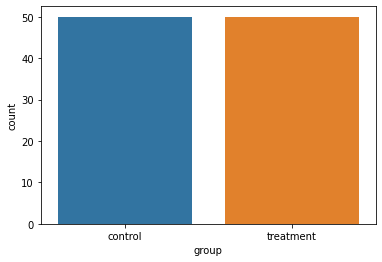

Observations: Group is shared 50% between control and treatment.

#### Landing page<a href="#Landing-page" class="anchor-link">¶</a>

In \[ \]:

    #checking for counts of landing page
    df['landing_page'].value_counts()

Out\[ \]:

    old    50
    new    50
    Name: landing_page, dtype: int64

In \[ \]:

    # complete the code to plot the countplot
    sns.countplot(data=df,x='landing_page')
    plt.show()

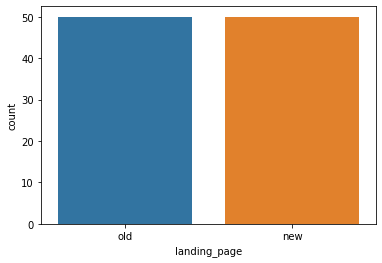

Observations: Landing page is shared 50% between old and new.

#### Time spent on the page<a href="#Time-spent-on-the-page" class="anchor-link">¶</a>

In \[ \]:

    sns.histplot(data=df,x='time_spent_on_the_page')
    plt.show()
    sns.boxplot(data=df,x='time_spent_on_the_page')
    plt.show()

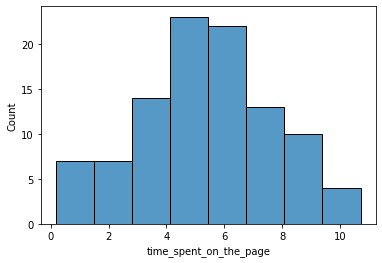

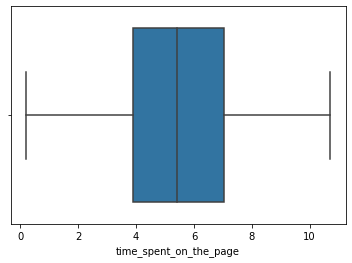

Observations: *Median time spent on the page is around 5 minutes.*There
are no outliers. \*More than 20 users spent averagely 5 minutes.

#### Converted<a href="#Converted" class="anchor-link">¶</a>

In \[ \]:

    df['converted'].value_counts()

Out\[ \]:

    yes    54
    no     46
    Name: converted, dtype: int64

In \[ \]:

    # complete the code to plot the countplot
    sns.countplot(data=df,x='converted')
    plt.show()

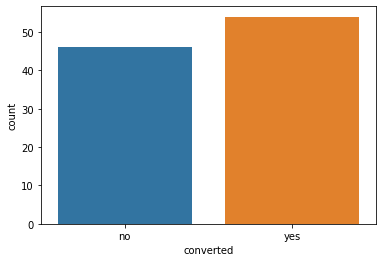

Observations: \*More than 50 users were converted to a subscriber while
around 48 users were not converted.

### Bivariate Analysis<a href="#Bivariate-Analysis" class="anchor-link">¶</a>

#### Landing page vs Time spent on the page<a href="#Landing-page-vs-Time-spent-on-the-page"
class="anchor-link">¶</a>

In \[ \]:

    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
    plt.show()

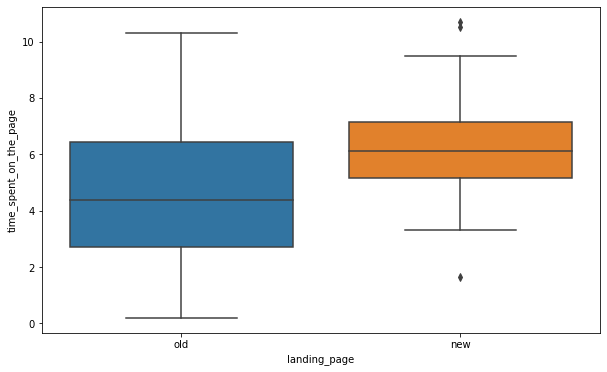

Observations: *Outliers exist below 25% and 75% percentile in
new_users.*Median of new_users are 6 users while that of old_users is
below 5 users.

#### Conversion status vs Time spent on the page<a href="#Conversion-status-vs-Time-spent-on-the-page"
class="anchor-link">¶</a>

In \[ \]:

    # complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
    plt.figure(figsize=(9, 9))
    sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
    plt.show()

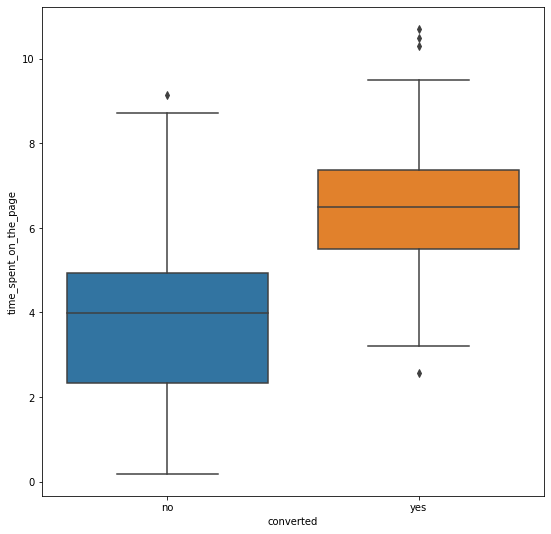

Observations: *3 outliers for converted users exist above 75% and an
outlier below 25%*Median of converted users is below 7 minutes which is
higher than median of 4 minutes non-converted users.

#### Language preferred vs Time spent on the page<a href="#Language-preferred-vs-Time-spent-on-the-page"
class="anchor-link">¶</a>

In \[ \]:

    # write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
    plt.figure(figsize=(9, 9))
    sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
    plt.show()

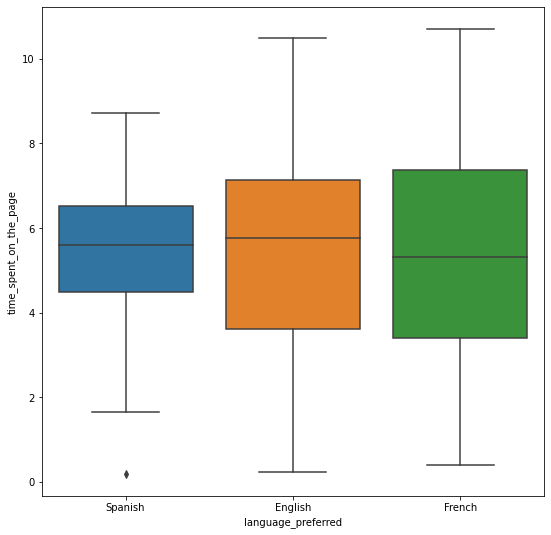

Observations:

-   There exist an outlier for Spanish language.
-   French has the least median of averagely 5 minutes.
-   English has the highest median .

## 1. Do the users spend more time on the new landing page than the existing landing page?<a
href="#1.-Do-the-users-spend-more-time-on-the-new-landing-page-than-the-existing-landing-page?"
class="anchor-link">¶</a>

### Performing a Visual Analysis<a href="#Performing-a--Visual-Analysis" class="anchor-link">¶</a>

In \[ \]:

    # visual analysis of the time spent on the new page and the time spent on the old page
    plt.figure(figsize=(8,6))
    sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
    plt.show()

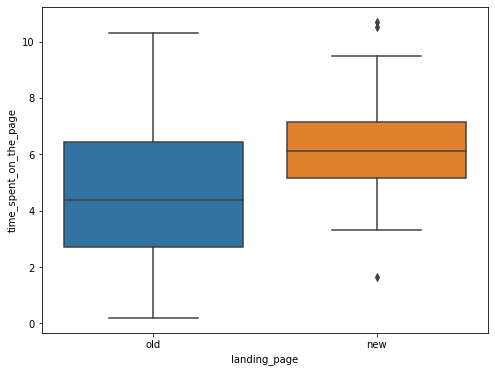

Obervations:

-   There are outliers below 25% and 75% on the new landing page.
-   The median for visitors on the new landing page is slightly above 6
    mins.
-   The 75% percentile is around 8 to 10 mins for the old landing page.

### Defining the null and alternate hypotheses<a href="#Defining-the-null-and-alternate-hypotheses"
class="anchor-link">¶</a>

\$H_0\$: mu1 = mu2 (The time spent on the old page is the same as the
new page)

\$H_a\$: mu1 \> mu2 (The time spent on the old page is more than the new
page)

### Selecting the Appropriate test<a href="#Selecting-the-Appropriate-test" class="anchor-link">¶</a>

-   The time spent is a continuous data.

-   The population is assumed to be normal distributed and independent.

-   The samples are taken randomly.

-   Viola! The appropriate test is test for equality of means

### Deciding the significance level<a href="#Deciding-the-significance-level" class="anchor-link">¶</a>

As given in the problem statement, we select \$\alpha = 0.05\$.

### Collecting and prepare data<a href="#Collecting-and-prepare-data" class="anchor-link">¶</a>

In \[ \]:

    df.groupby(['landing_page'])['time_spent_on_the_page'].mean().round(2)

Out\[ \]:

    landing_page
    new    6.22
    old    4.53
    Name: time_spent_on_the_page, dtype: float64

The sample mean of the time spent on the old page is: 4.53

The sample mean of the time spent on the new page is: 6.22

Let

mu1 = old = 4.53 mu2 = new = 6.22

In \[ \]:

    # create subsetted data frame for new landing page users 
    time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

    # create subsetted data frame for old landing page users
    time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In \[ \]:

    print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
    print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

    The sample standard deviation of the time spent on the new page is: 1.82
    The sample standard deviation of the time spent on the old page is: 2.58

### Calculating the p-value<a href="#Calculating-the-p-value" class="anchor-link">¶</a>

In \[ \]:

    # complete the code to import the required function
    from scipy.stats import ttest_ind 

    # write the code to calculate the p-value
    test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = True, alternative = 'two-sided')  #complete the code by filling appropriate parameters in the blanks

    print('The p-value is', p_value)

    The p-value is 0.000263224705619001

### Comparing the p-value with \$\alpha\$<a href="#Comparing-the-p-value-with-$%5Calpha$"
class="anchor-link">¶</a>

In \[ \]:

    # print the conclusion based on p-value
    if p_value < 0.05:
        print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
    else:
        print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

    As the p-value 0.000263224705619001 is less than the level of significance, we reject the null hypothesis.

### Drawing an inference<a href="#Drawing-an-inference" class="anchor-link">¶</a>

As the p_value is less than the level of significance(0.05) I reject
null hypothesis and conclude there is a difference in the time spent on
the old page and new page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?<a
href="#2.-Is-the-conversion-rate-(the-proportion-of-users-who-visit-the-landing-page-and-get-converted)-for-the-new-page-greater-than-the-conversion-rate-for-the-old-page?"
class="anchor-link">¶</a>

In \[ \]:

    # comparing the conversion rate for the new page and the conversion rate for the old page
    pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
    plt.legend()
    plt.show()

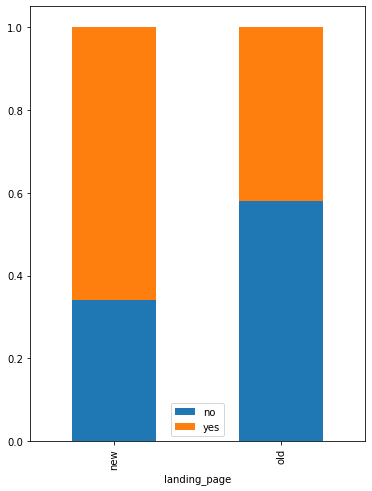

Observations :

-   The new landing page has more converted users than the old landing
    page.

\$H_0\$: the conversion on the new page is the same as the old page mu1
= mu2

\$H_a\$: the conversion on the new page is greater than the old page mu1
\> mu2

-   Binomially distributed population - Yes a product is treatment and
    converted.

-   Random sampling from the population.

-   The binomial population is approximated to normal distribution.

This is a one-tailed test concerning two population proportions from two
independent populations. **Based on this information, I select the two
proportion z test**.

As given in the problem statement, we select α = 0.05.

In \[ \]:

    # calculate the number of converted users in the treatment group
    new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
    # calculate the number of converted users in the control group
    old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

    n_control = df.group.value_counts()['control'] # total number of users in the control group
    n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

    print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

    The numbers of users served the new and old pages are 50 and 50 respectively

In \[ \]:

    # complete the code to import the required function
    from statsmodels.stats.proportion import proportions_ztest   

    # write the code to calculate the p-value
    test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='two-sided')   #complete the code by filling appropriate parameters in the blanks


    print('The p-value is', p_value)

    The p-value is 0.016052616408112556

In \[ \]:

    # print the conclusion based on p-value
    if p_value < 0.05:
        print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
    else:
        print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

    As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.

Drawing an inference

I can infer from the p-value that the conversion rate of the new landing
page is higher than that of the old landing page.

## 3. Is the conversion and preferred language are independent or related?<a
href="#3.-Is-the-conversion-and-preferred-language-are-independent-or-related?"
class="anchor-link">¶</a>

In \[ \]:

    # complete the code to visually plot the dependency between conversion status and preferred langauge
    pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
    plt.legend()
    plt.show()

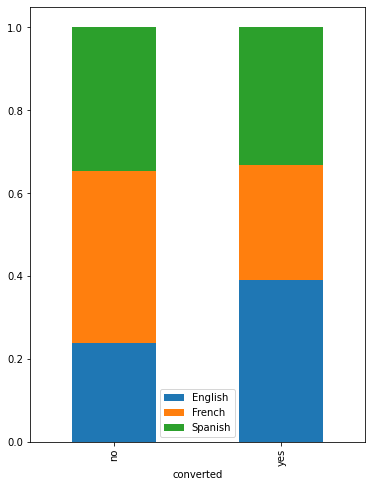

\$H_0\$: the conversion of users for spanish, french and english are
they equal. mu1 = mu2 = mu3

\$H_a\$: the conversion of users for spanish , french and english are
not equal, rather there is a difference across the preferred languages.

mu1 != mu2 != mu3

-   Categorical variables are French, English and Spanish.
-   Random sasmpling from the population.
-   The expected value of the number of sample observations is more than
    5.

This is a problem of the test of independence, concerning two
categorical variables - converted status and preferred language. **Based
on this information, I select the chi2 contigency test as the
appropriate test.**

As given in the problem statement, we select α = 0.05.

In \[9\]:

    # complete the code to create a contingency table showing the distribution of the two categorical variables
    contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

    contingency_table

Out\[9\]:

| language_preferred | English | French | Spanish |
|--------------------|---------|--------|---------|
| converted          |         |        |         |
| no                 | 11      | 19     | 16      |
| yes                | 21      | 15     | 18      |



In \[10\]:

    # complete the code to import the required function
    from scipy.stats import chi2_contingency
    # write the code to calculate the p-value
    chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

    print('The p-value is', p_value)

    The p-value is 0.21298887487543447

In \[11\]:

    # print the conclusion based on p-value
    if p_value < 0.05:
        print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
    else:
        print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

    As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.

I can infer that the conversion is related to the language preferred.

## 4. Is the time spent on the new page same for the different language users?<a
href="#4.-Is-the-time-spent-on-the-new-page-same-for-the-different-language-users?"
class="anchor-link">¶</a>

Performing a visual analysis

In \[ \]:

    # created a new DataFrame for users who got served the new page
    df_new = df[df['landing_page'] == 'new']

In \[ \]:

    # visualizing the plot of time spent on the new page for different language users
    plt.figure(figsize=(8,8))
    sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
    plt.show()

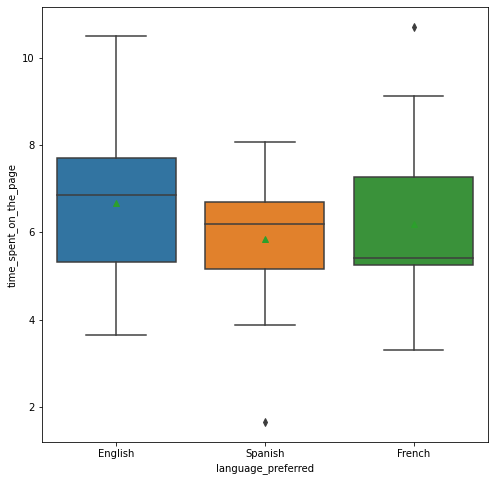

Observations :

-   The mean and median of time spent on the page for English is higher
    than the two other languages.
-   The mean time for that of the French is higher than Spanish while
    the median of the Spanish is slightly above 6 minutes while that of
    the French is less than 6 minutes.
-   Both Spanish and French have an outlier each , below minimum and
    maximum cap respectively.

In \[ \]:

    # calculate the mean time spent on the new page for different language users
    df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

Out\[ \]:

    language_preferred
    English    6.663750
    French     6.196471
    Spanish    5.835294
    Name: time_spent_on_the_page, dtype: float64

Define the null and alternate hypotheses

\$H_0:\$ the time spent on the page for the three preferred languages
are the same. mu1 = mu2 = mu3

\$H_a:\$ the time spent on the page differ for the three languages. mu1
!= mu2 != mu3

-   Population is assumed to be normally distributed.
-   Samples are independent simple random samples.
-   Population variances are assumed to be equal.

This is a problem, concerning three population means. **Based on this
information, I select the f_oneway test to compare the three population
means.**

As given in the problem statement, we select α = 0.05.

In \[ \]:

    # create a subsetted data frame of the time spent on the new page by English language users 
    time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
    # create subsetted data frames of the time spent on the new page by French and Spanish language users
    time_spent_French = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   # complete your code here
    time_spent_Spanish = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   # complete your code here

In \[ \]:

    # complete the code to import the required function
    from scipy.stats import f_oneway 

    # write the code to calculate the p-value
    test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

    print('The p-value is', p_value)

    The p-value is 0.43204138694325955

In \[ \]:

    # print the conclusion based on p-value
    if p_value < 0.05:
        print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
    else:
        print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

    As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.

I can infer that the time spent on the new page are almost the same for
language users.

## Conclusion and Business Recommendations<a href="#Conclusion-and-Business-Recommendations"
class="anchor-link">¶</a>

In conclusion, I analyzed a dataset of 100 different users that visited
the new and old landing pages and were either converted or not.

1.  There were 34 Spanish , 34 French and 32 English users on the
    company's page.
2.  The creation of the new landing page converted enabled the
    conversion of more users than the old landing page.
3.  The time spent of the new landing page were fairly the same for all
    language users.

I would recommend the following to the company:

1.  To improve on the new landing page and make it interactive to
    attract more users.
2.  Since there is no significant difference in time spent by the three
    preferred languages , all three should receive similar support.

------------------------------------------------------------------------